In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import preprocessing

import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display

from grafica import *
from ClassNeuronaLineal import NeuronaLineal

In [2]:
# Leer HOUSING.csv
df = pd.read_csv("../Datos/housing.csv", sep=';')
#nColum = list(datos.columns.values)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


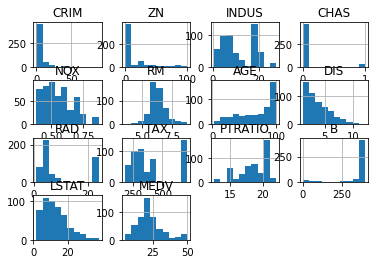

In [3]:
nn=df.hist()

In [4]:
Ejemplos = np.array(df)

normalizarEntrada = 1

if normalizarEntrada:
    normalizador = preprocessing.MinMaxScaler()
    Ejemplos = normalizador.fit_transform(Ejemplos)

In [5]:
nomCol = np.array(df.columns.values)

attPred = 13 #12 mpg y 13 precio  #-- nro de atributo a predecir    
T = Ejemplos[:, attPred]  #.reshape(-1,1)
X = np.delete(Ejemplos, [attPred], 1) #elimina la columna 12 a lo largo del eje 1
nomBuscado = nomCol[attPred]
nomCol = np.delete(nomCol,[attPred])


In [6]:
nl = NeuronaLineal(alpha=0.01, n_iter=30, cotaE=10e-06)
nl.fit(X, T)

In [7]:
print("W = ", nl.w_)
print("b = ", nl.b_)

W =  [-0.15959075  0.1179227   0.07830302  0.03198199 -0.06283395  0.55213667
 -0.02740038 -0.2741656   0.12802802 -0.1834585  -0.10775588  0.07842492
 -0.40884021]
b =  0.29303406359860185


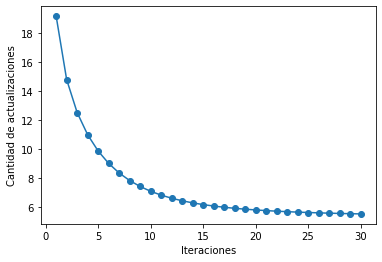

In [8]:
plt.plot(range(1, len(nl.errors_) + 1), nl.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()